**Data Link:** https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

### Importing libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1135,ham,K do I need a login or anything,NaN,NaN,NaN
1183,ham,Am i that much bad to avoid like this?,NaN,NaN,NaN
1310,ham,"I.ll always be there, even if its just in spir...",NaN,NaN,NaN
1351,ham,Yo theres no class tmrw right?,NaN,NaN,NaN
948,ham,Chk in ur belovd ms dict,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# Process to follow:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Website
# 6. Deployment

### 1. Data Cleaning:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
78,ham,Does not operate after &lt;#&gt; or what
664,ham,Yes baby! We can study all the positions of th...
2556,ham,Fuck babe ... What happened to you ? How come ...
5466,spam,http//tms. widelive.com/index. wml?id=820554ad...
2946,ham,Leave it. U will always be ignorant.


In [9]:
# Renaming the cols
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
2975,ham,I love u 2 my little pocy bell I am sorry but ...
1522,ham,I thk u dun haf 2 hint in e forum already lor....
5464,ham,I will treasure every moment we spend together...
4263,ham,She just broke down a list of reasons why nobo...
2788,ham,ÌÏ got wat to buy tell us then Ì_ no need to c...


In [10]:
# Label Encoding for 'target' variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# Check for duplicate values
df.duplicated().sum()

403

In [15]:
# Remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

### 2. EDA:

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

**Observation:** The data is highly imbalanced, with the label '0' occurring approximately 4,516 times, while the label '1' appears only around 653 times.

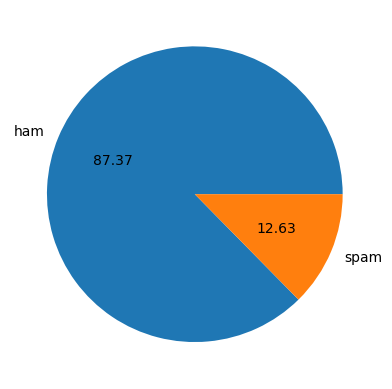

In [20]:
# Pie chart for 'target' variable
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [21]:
import nltk

In [22]:
# nltk.download('punkt')

In [23]:
# Number of characters 
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# Number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
# Number of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# Describe function for Ham messages
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# Describe function for Spam messages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

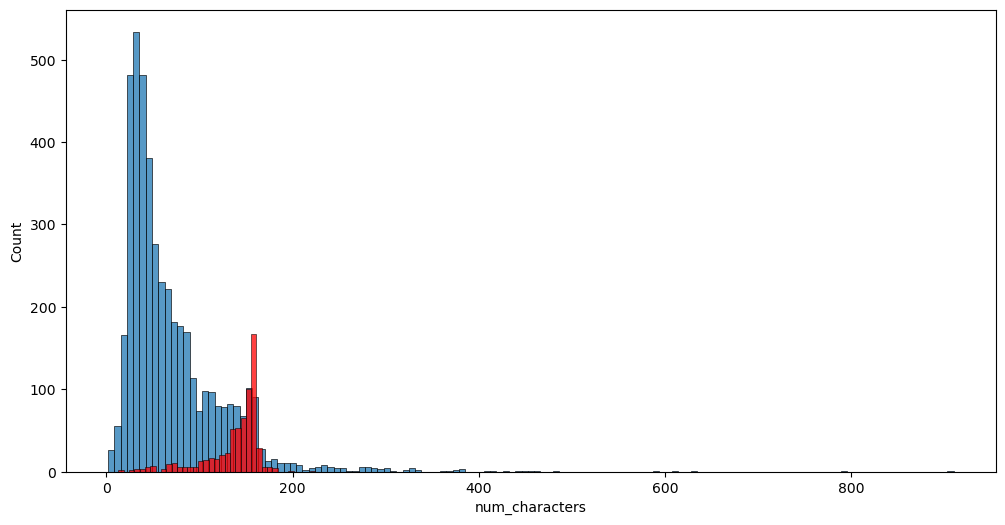

In [33]:
# Histograms for 'num_characters'
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

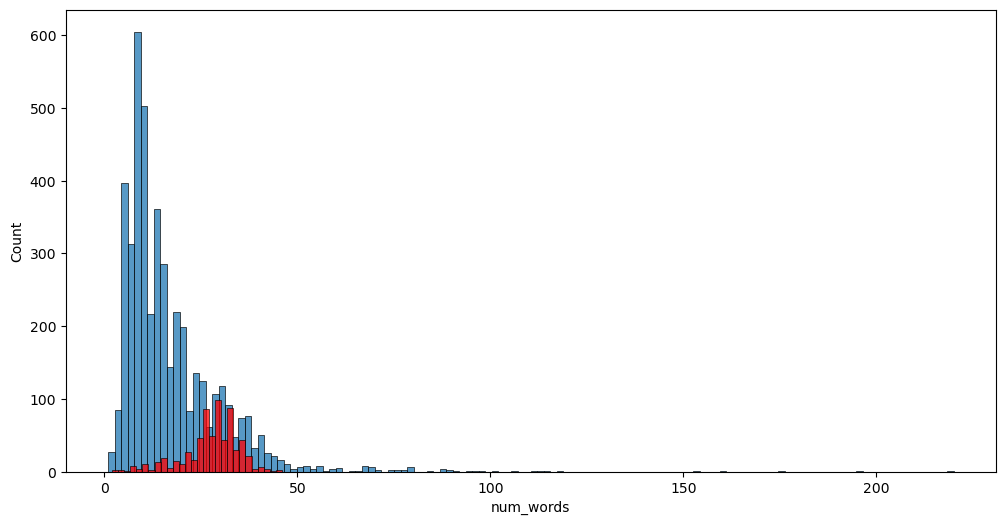

In [34]:
# Histograms for 'num_words'
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

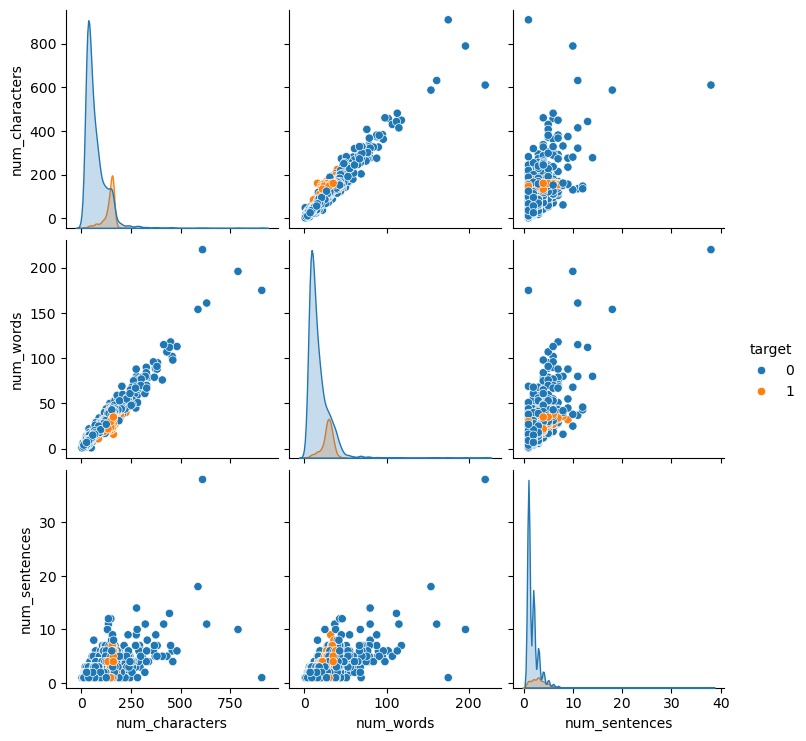

In [35]:
# Pairplot
sns.pairplot(df, hue='target')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5169 non-null   int32 
 1   text            5169 non-null   object
 2   num_characters  5169 non-null   int64 
 3   num_words       5169 non-null   int64 
 4   num_sentences   5169 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 222.1+ KB


In [37]:
# Select only the numeric columns
df_numeric = df.select_dtypes(include=['int32', 'int64', 'float64'])

# Now calculate the correlation matrix
df_numeric.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

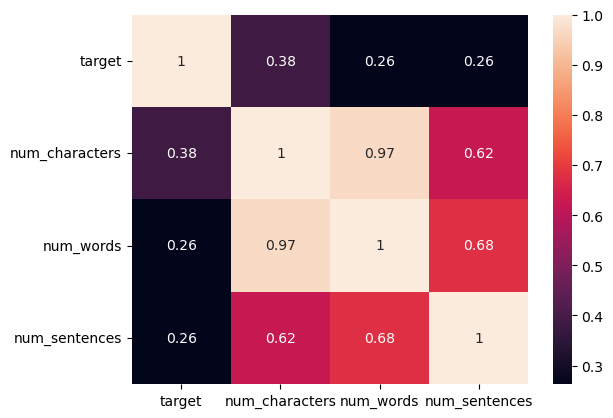

In [38]:
# Heatmap to visualize the correlation matrix of the numerical variables
sns.heatmap(df_numeric.corr(), annot=True)

### 3. Data Preprocessing:
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [39]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    # Lower case & Tokenization
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [40]:
df['transformed_text'] = df['text'].apply(transform_text)

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
# WordCloud Image
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [43]:
# Wordcloud image for Spam messages
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

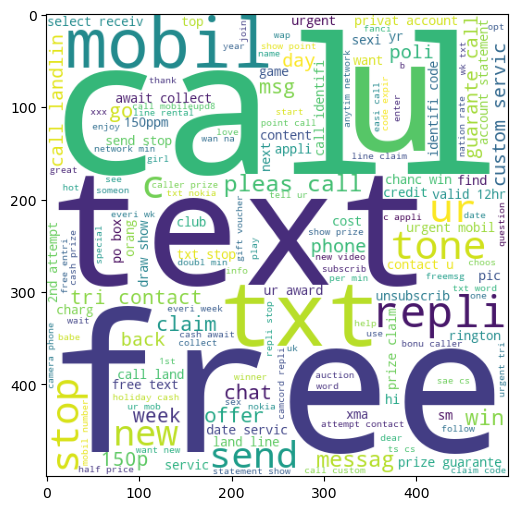

In [44]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

In [45]:
# Wordcloud image for Ham messages
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

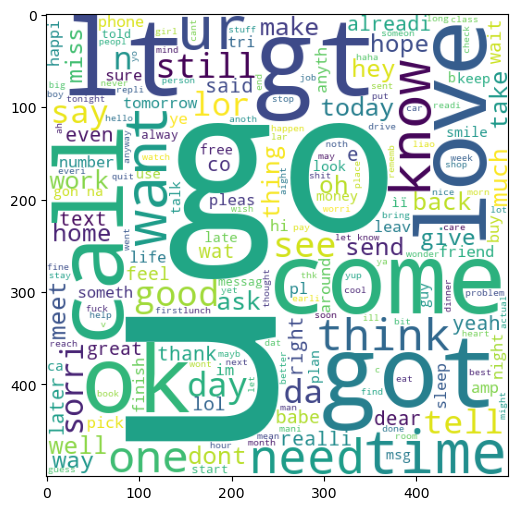

In [46]:
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

In [47]:
# List of words of spam messages
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

9939

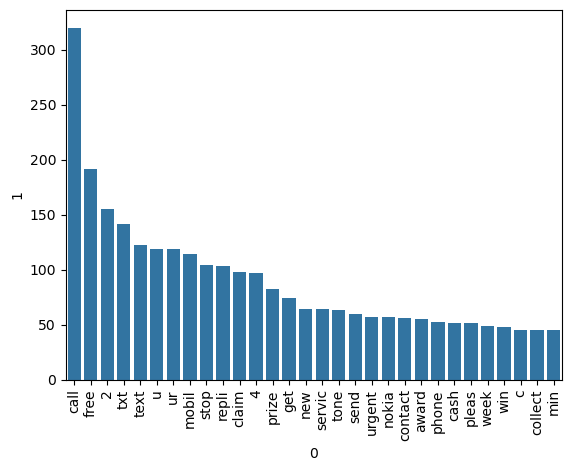

In [49]:
# Visualize the 30 most common words in the spam_corpus list
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
# List of words of Ham messages
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
len(ham_corpus)

35404

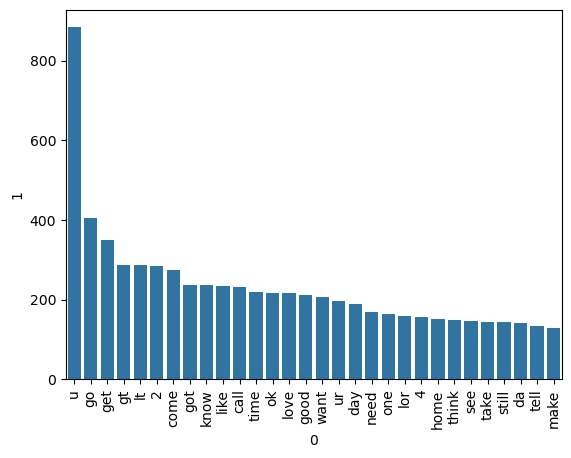

In [52]:
# Visualize the 30 most common words in the ham_corpus list.
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### 4. Model Building:

In [53]:
# Initialize TF-IDF vectorizer with a maximum of 3000 features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [54]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [55]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
X.shape

(5169, 3000)

In [57]:
Y = df['target'].values

In [58]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split

In [60]:
# Split data into 80% training and 20% testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [61]:
# Import Multinomial Naive Bayes classifier and evaluation metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
mnb = MultinomialNB()

In [62]:
# Train the Naive Bayes classifier on the training data
mnb.fit(X_train, Y_train)

# Predict labels for the test data
Y_pred = mnb.predict(X_test)

# Print accuracy, confusion matrix, and precision score of the model
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(precision_score(Y_test, Y_pred))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [63]:
# Save TF-IDF vectorizer and Naive Bayes model to disk
import pickle
pickle.dump(tfidf, open('../models/vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('../models/model.pkl', 'wb'))